In [8]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from transformers import pipeline
import nltk

In [9]:
from google.colab import files
files.upload()

Saving tweets-data.csv to tweets-data (1).csv


{'tweets-data (1).csv': b',Date Created,Number of Likes,Source of Tweet,Tweets,hashtag\n0,2023-06-25 19:16:20+00:00,0,,@jacksonhinklle #wagner with 6.2 billion dollar  \xf0\x9f\xa4\xa3,wagner\n1,2023-06-25 19:16:18+00:00,0,,"Pobrecito es discapacitado\n#Reddetuiterosdemocraticos #LosCorruptosSiempreFueronEllos #Russia #Wagner #EcuadorSinMiedo #Villavicencio #Pride2023",wagner\n2,2023-06-25 19:16:07+00:00,0,,"News from the EIR Daily Alert\n\n\xe2\x80\x9c#Putin Addressed the #Russian People on the Armed #Insurrection\xe2\x80\x9d\n\nJune 24, 2023 (EIRNS)\xe2\x80\x94https://t.co/sAR7wViIVP\n\n#Russia, #Russian #President #VladimirPutin, #Putin, #Wagner, #WagnerGroup, #sundayvibes https://t.co/ufwk2xaoDZ",wagner\n3,2023-06-25 19:15:56+00:00,0,,It\'s Messi day #Messi\xf0\x93\x83\xb5 #Messi36 #Russia #bigstage2023 #Wagner #sundayvibes https://t.co/YfcLPYGlWX,wagner\n4,2023-06-25 19:15:54+00:00,0,,Il passaggio chiave di Machiavelli era questo (\xe2\x80\x98Principe\xe2\x80\x99 cap. 12). #Wagner

In [10]:
df = pd.read_csv('tweets-data.csv')
df = df.sample(500, random_state=42).reset_index(drop=True)

In [11]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag
0,897,2023-06-25 11:06:23+00:00,2,NaN,Le #DessinDePresse de Sanaga : ls sont morts c...,titan
1,594,2023-06-25 18:23:19+00:00,0,NaN,#Russia #Wagner #RussiaCivilWar https://t.co/P...,wagner
2,868,2023-06-25 11:32:00+00:00,1,NaN,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,titan
3,52,2023-06-25 19:11:12+00:00,21,NaN,Auch heute geht die politische Nachricht des T...,wagner
4,390,2023-06-25 16:21:52+00:00,1,NaN,@crazyclipsonly Same type that would take a ho...,titanic


In [16]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
# ─────────────── 4. NETTOYAGE ───────────────
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    tokens = word_tokenize(text.lower())
    return " ".join(tokens)

df['cleaned_tweet'] = df['Tweets'].astype(str).apply(clean_tweet)

In [18]:
sentiment_pipeline = pipeline("sentiment-analysis")

def transformer_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]
        return pd.Series([result['label'].lower(), result['score']])
    except:
        return pd.Series(["error", 0.0])

df[['transformer_label', 'transformer_score']] = df['cleaned_tweet'].apply(transformer_sentiment)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


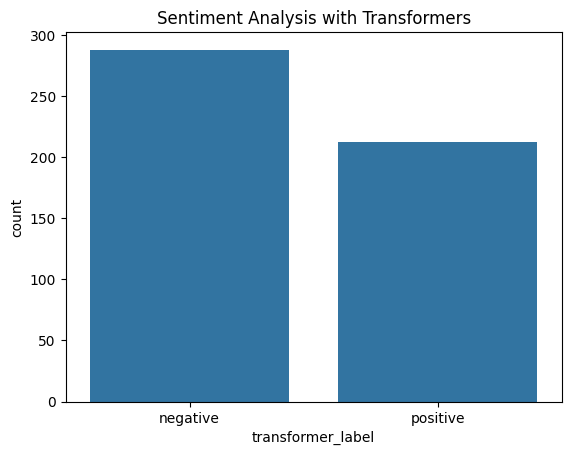

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='transformer_label', data=df)
plt.title("Sentiment Analysis with Transformers")
plt.show()
